# Pylift Used on Complex Dataset

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from pylift import TransformedOutcome
from sklift.metrics import auqc, auuc, uplift_at_k
from sklift.viz import plot_uplift_preds, plot_uplift_qini_curves
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(style="white") # white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
%matplotlib inline

In [3]:
filepath = '/nas/isg_prodops_work/stemr/2020/2020_03 - Capstone Project/'
complex_df = pd.read_pickle(filepath + 'complex_df_kitchensink.pkl')
complex_df['segments'] = complex_df['segments'].astype('str')
cat_columns = complex_df.select_dtypes(['category']).columns
complex_df[cat_columns] = complex_df[cat_columns].apply(lambda x: x.cat.codes)

In [84]:
#holdout for final performance eval
dev_df, holdout_df = train_test_split(complex_df, test_size=0.01,random_state=847)

In [85]:
holdout_df.shape

(20000, 329)

In [86]:
holdout_df = holdout_df.reset_index(drop=True)

In [87]:
dev_df = dev_df.sample(500000)

In [88]:
dev_df.shape

(500000, 329)

In [89]:
feature_names = list(pd.read_csv(filepath + 'complex_df_feat_names.csv')['feature'])
target_name = 'conversion_post'
treatment_name = 'exposed'

In [90]:
important_columns = feature_names + [target_name] + [treatment_name]

In [91]:
dev_df2 = dev_df[important_columns]

In [92]:
up = TransformedOutcome(dev_df2, col_treatment='exposed', col_outcome='conversion_post')

In [93]:
up.randomized_search(n_iter=10, n_jobs=10, random_state=847, cv=2)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   8 out of  20 | elapsed: 17.9min remaining: 26.9min
[Parallel(n_jobs=10)]: Done  15 out of  20 | elapsed: 33.6min remaining: 11.2min
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed: 38.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=1,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          r...
                                                      16, 17, 18, 19, 20],
                                        'min_child_weight': [1, 2, 3, 

In [94]:
up.rand_search_.best_params_

{'colsample_bytree': 0.4514605399521327,
 'gamma': 5.772217841813401,
 'max_depth': 14,
 'min_child_weight': 438,
 'n_estimators': 141,
 'subsample': 0.6641773033383578}

In [95]:
up.fit(**up.rand_search_.best_params_)

[21:50:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
up.x_test

,feature_172,feature_181,feature_176,feature_166,feature_168,feature_157,feature_150,feature_167,feature_144,feature_160,...,feature_272,feature_313,feature_165,feature_312,feature_218,feature_245,feature_321,feature_283,feature_288,feature_260
1381268,1.235543,-0.850473,0.609538,0.324249,0.815521,0.426780,0.543340,0.604918,0.094535,0.490547,...,760,27.308034,0.378785,8.596027,0,33,51.366720,543,982,279
1934962,0.099463,1.145471,-1.080104,-1.274691,-0.127782,0.288986,0.706067,0.834206,1.549921,0.215917,...,577,62.765631,-1.134902,23.123083,0,689,55.547167,323,829,152
391514,-0.696977,0.668065,0.196728,-0.436455,0.109083,1.286908,0.329599,0.139216,0.545821,0.349779,...,542,43.137305,-0.335289,15.276343,0,479,54.292862,377,514,65
119241,1.070969,-0.173055,0.303984,-1.188598,-0.022870,-0.318628,0.222537,1.927709,-0.341620,0.686142,...,886,42.856536,1.564944,0.094955,0,634,78.523525,848,792,884
1562247,-0.435368,-0.470228,0.889881,0.127798,-1.300705,-0.237054,-0.383893,-0.002826,-0.407724,-1.024991,...,531,26.712229,0.196732,43.933884,1,640,18.970278,98,709,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080927,0.254016,0.657559,0.739197,-0.239659,0.637919,0.735643,-0.878403,2.201916,1.076350,0.208264,...,569,4.250681,-0.682449,13.833122,1,306,59.799581,804,670,659
449415,0.619875,1.115859,0.408172,0.605532,0.346300,-0.468790,0.387044,-0.712146,0.266899,0.611427,...,259,26.802387,0.277912,67.832628,0,970,50.871270,962,37,113
1035271,-0.156222,-1.192419,-0.466445,0.228897,-0.990123,-0.487973,0.549492,-0.246351,-0.593440,-1.139279,...,801,3.854349,-0.411873,0.402098,0,932,17.425531,782,192,673
934931,-0.362977,-0.297572,0.176597,-0.420751,0.164633,0.369914,0.263341,-0.036757,-0.626138,-0.278741,...,486,11.324342,0.761163,91.838525,1,688,38.295116,668,309,36


In [97]:
test_df = pd.merge(up.x_test,up.y_test, left_index=True, right_index=True)
dev_df2 = dev_df[['exposed','true_lift','segments']]
test_df = pd.merge(test_df, dev_df2, left_index=True, right_index=True) 

test_df = test_df.reset_index(drop=True)
test_df = pd.merge(test_df,pd.DataFrame(up.transformed_y_test_pred, columns=['pylift_pred']), left_index=True, right_index=True)

In [98]:
pred_df = test_df 

In [99]:
pred_df.shape

(100000, 154)

In [100]:
pred_df['random_prediction'] = pd.DataFrame(np.random.uniform(-1,1,size=len(pred_df['conversion_post'])))

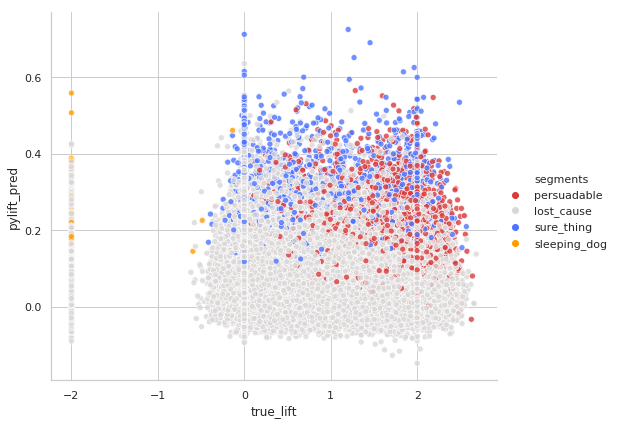

In [101]:
my_pal = {"sure_thing": "#4d73ff", "lost_cause": "#dbd7d7", "persuadable":"#d93b3b", "sleeping_dog":'#ff9d00'}
sns.relplot(x="true_lift", y="pylift_pred",
            hue="segments",palette=my_pal, data=pred_df, height=6, aspect=1.2, alpha=0.80);

In [102]:
uplift_at_k(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'], k=0.3)

0.19303049552001644

In [103]:
auuc(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'])

615524257.5114537

In [104]:
auqc(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'])

459854877.632103

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b9aff0ba8>,
      dtype=object)

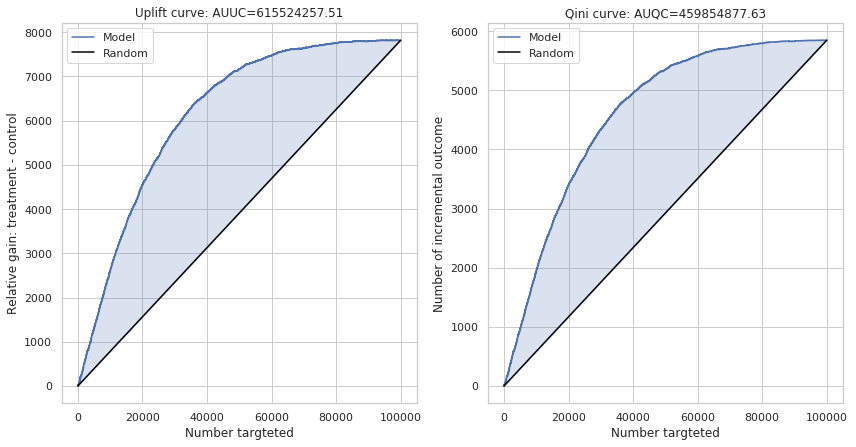

In [105]:
plot_uplift_qini_curves(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'])

In [109]:
##Assumptions 
budget = 20000 #budget per 100,000 customers
conversion_profit = 500 #Typical profit generated from a sale
cost_per_ad = 4 #cost to treat a customer with an advertisment
treatment_total = int(budget/cost_per_ad)

random_df = pred_df[pred_df["exposed"] == 1].sample(treatment_total)
prediction_df = pred_df[pred_df["exposed"] == 1].sort_values("pylift_pred",ascending=False).head(treatment_total)

random_p_count = random_df[random_df['segments']=='persuadable']['conversion_post'].sum()
prediction_p_count = prediction_df[prediction_df['segments']=='persuadable']['conversion_post'].sum()
if treatment_total <= pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum():
    perfect_p_count = treatment_total
else:
    perfect_p_count = pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum()
    
    
random_roi = (random_p_count*conversion_profit)- budget
prediction_roi = (prediction_p_count*conversion_profit)- budget
perfect_roi = (perfect_p_count*conversion_profit)- budget
        
print('Treatment Total: {:0,.0f}'.format(treatment_total))
print('Random ROI: ${:0,.0f}'.format(random_roi))
print('Model ROI: ${:0,.0f}'.format(prediction_roi))
print('Perfect ROI: ${:0,.0f}'.format(perfect_roi))

print('Improvement from random: {:.2f}%'.format(((prediction_roi-random_roi)/random_roi)*100))
print('Incremental conversions from random: {}'.format(prediction_p_count-random_p_count))
print('Model to perfect ratio: {:.2f}%'.format((prediction_roi/perfect_roi)*100))

Treatment Total: 5,000
Random ROI: $181,500
Model ROI: $675,000
Perfect ROI: $2,480,000
Improvement from random: 271.90%
Incremental conversions from random: 987
Model to perfect ratio: 27.22%


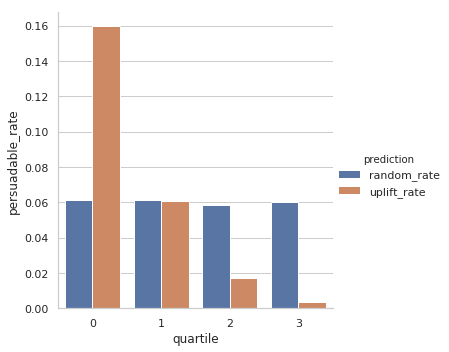

In [107]:
rand1 = pred_df[pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.75)]
rand2 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.75))  & 
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.50))]
rand3 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.50))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.25))]
rand4 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.25))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.0))]

rand1_p_count = len(rand1[rand1['segments']=='persuadable'])/len(rand1['segments'])
rand2_p_count = len(rand2[rand2['segments']=='persuadable'])/len(rand2['segments'])
rand3_p_count = len(rand3[rand3['segments']=='persuadable'])/len(rand3['segments'])
rand4_p_count = len(rand4[rand4['segments']=='persuadable'])/len(rand4['segments'])

random_rates = pd.DataFrame([rand1_p_count,rand2_p_count,rand3_p_count,rand4_p_count],columns=['random_rate'])

uplift1 = pred_df[pred_df['pylift_pred'] > pred_df['pylift_pred'].quantile(q=.75)]
uplift2 = pred_df[(pred_df['pylift_pred'] <= pred_df['pylift_pred'].quantile(q=.75))  & 
                  (pred_df['pylift_pred'] > pred_df['pylift_pred'].quantile(q=.50))]
uplift3 = pred_df[(pred_df['pylift_pred'] <= pred_df['pylift_pred'].quantile(q=.50))  &
                  (pred_df['pylift_pred'] > pred_df['pylift_pred'].quantile(q=.25))]
uplift4 = pred_df[(pred_df['pylift_pred'] <= pred_df['pylift_pred'].quantile(q=.25))  &
                  (pred_df['pylift_pred'] > pred_df['pylift_pred'].quantile(q=.0))]

uplift1_p_count = len(uplift1[uplift1['segments']=='persuadable'])/len(uplift1['segments'])
uplift2_p_count = len(uplift2[uplift2['segments']=='persuadable'])/len(uplift2['segments'])
uplift3_p_count = len(uplift3[uplift3['segments']=='persuadable'])/len(uplift3['segments'])
uplift4_p_count = len(uplift4[uplift4['segments']=='persuadable'])/len(uplift4['segments'])
uplift_rates = pd.DataFrame([uplift1_p_count,uplift2_p_count,uplift3_p_count,uplift4_p_count],columns=['uplift_rate'])

persuade_rate_df = pd.merge(random_rates,uplift_rates, left_index=True, right_index=True)
persuade_rate_df = persuade_rate_df.reset_index()

persuade_rate_df2 = pd.melt(persuade_rate_df, id_vars='index', value_vars=['random_rate','uplift_rate'])

persuade_rate_df2 = persuade_rate_df2.rename(columns={'index':'quartile','value':'persuadable_rate','variable':'prediction'})

sns.catplot(x='quartile', y='persuadable_rate', hue='prediction', data=persuade_rate_df2, kind='bar');